<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Networkx dataset examples

---

Appart from functions for generating particular types of graphs, Networkx contains several benchmark social network datasets. As they contain a fairly low number of nodes and links they are ideal for practising the concepts learned in the lesson.

### 1. Zachary's Karate Club graph: 

[Zachary's Karate Club](https://www.jstor.org/stable/3629752?seq=1#page_scan_tab_contents) graph is a result of a social science field study recording if 34 members of a Californian Karate Club were interacting outside the club. It is a benchmark for detecting communities in graphs as during the study a conflict between the administrator and the instructor of the club lead to a split with some members forming a new club.

If you are the first to mention this dataset on a network conference, you can win a trophy and become a member of the *Zachary Karate Club Club*:

<img src="./assets/images/Karate_Club_Trophy.jpg" style="width:500px;height:400px;">


### 2. The Florentine family graph: 

This is data about how the most important Florentine families in the early 15th century were connected by marriages among the families (Ronald L. Breiger and Philippa E. Pattison Cumulated social roles: The duality of persons and their algebras,1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256). In fact, the time covered is just around the time that the Medici family had been expelled from Florence before returning to power, and the families represented here are known to have shown opposition to the Medici family.

### 3. The Davis Southern Women Graph

This dataset was collected by Davis and Gardner in the 1930s. It contains the observed attendance by 18 Southern women at 14 social events, presumably comparable to modern meet ups (A. Davis, Gardner, B. B., Gardner, M. R., 1941. Deep South. University of Chicago Press, Chicago, IL.).

## For each of the graphs, find 

* the graph info
* the list of nodes
* the list of edges
* the degree distribution (plot a histogram)
* the clustering coefficients (for each node and the average, plot a histogram)
* the shortest paths for the nodes and their average length
* obtain the vertex and edge betweenness ranking for each graph
* plot the graph
* use the Girvan-Newman algorithm for community detection
* use hierarchical clustering for community detection
    - do you see any differences in the community structure resulting from the two algorithms?

**Hints:** 
- load the datasets with the commands below
- the last graph is bipartite - obtain the clustering coefficients and shortest paths for the projections on top and bottom nodes
- for the Karate club graph, hierarchical clustering with two clusters should give you communities representing the actual split that occured in the group
- for the bipartite graph, consider communities of the whole graph and the graphs obtained by projecting on the two groups

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, jaccard
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [247]:
G_karate = nx.karate_club_graph()
G_florentine = nx.florentine_families_graph()
G_davis = nx.davis_southern_women_graph()

## the graph info


In [248]:
print(nx.info(G_karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [249]:
print(nx.info(G_florentine))

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 20
Average degree:   2.6667


In [250]:
print(nx.info(G_davis))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


## the list of nodes

In [251]:
G_karate.node()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [252]:
G_florentine.node()

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

In [253]:
G_davis.node()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

## the list of edges

In [254]:
G_karate.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [255]:
G_florentine.edges()

EdgeView([('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')])

In [256]:
G_davis.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

## the degree distribution (plot a histogram)

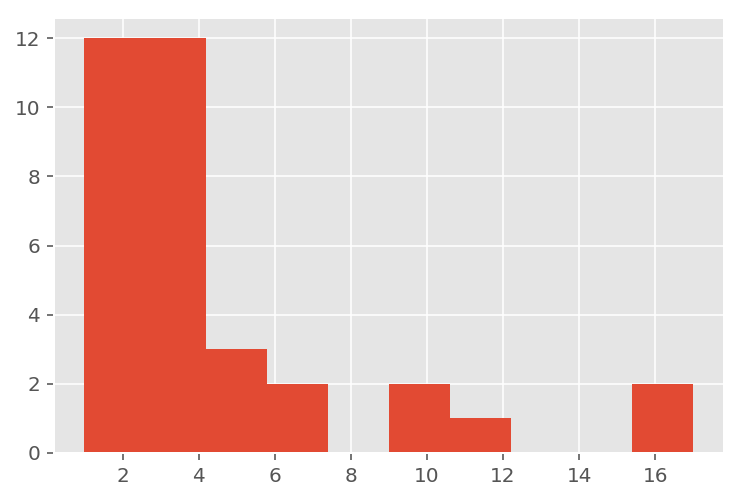

In [257]:
plt.hist(dict(G_karate.degree()).values());

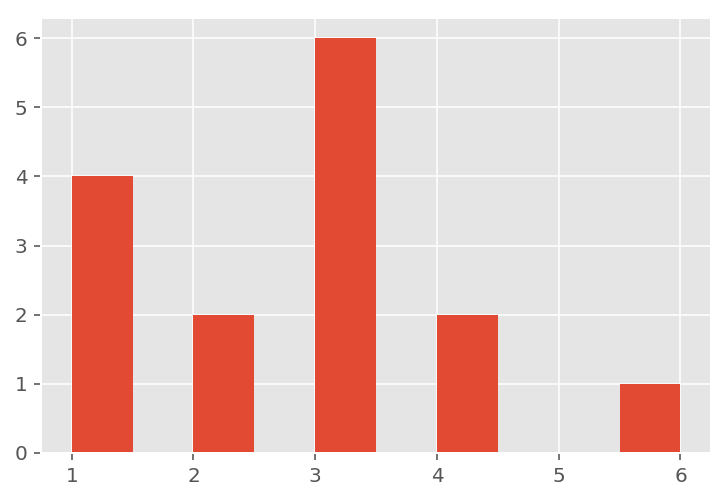

In [258]:
plt.hist(dict(G_florentine.degree()).values());

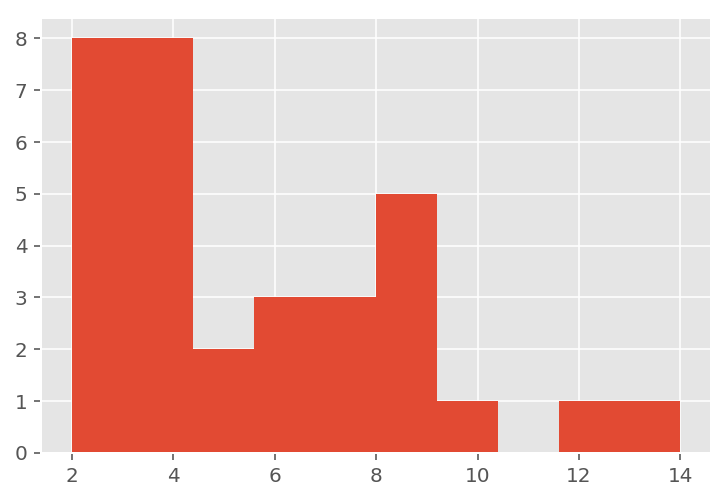

In [259]:
plt.hist(dict(G_davis.degree()).values());

## the clustering coefficients (for each node and the average, plot a histogram)

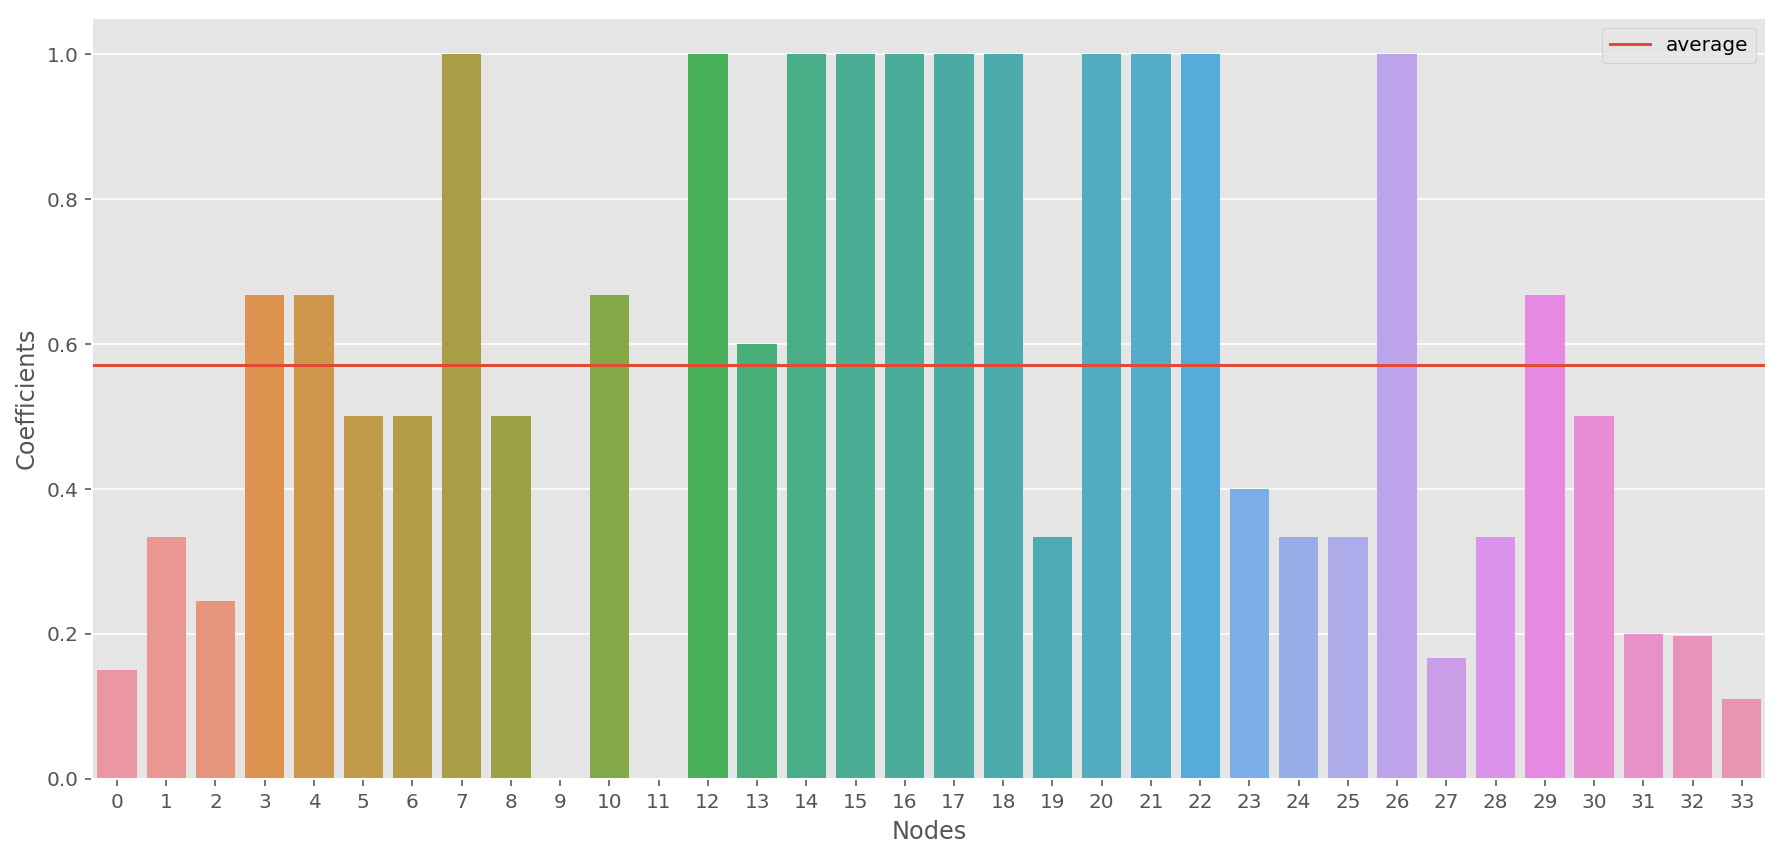

In [260]:
plt.figure(figsize=(15,7))
sns.barplot(x=list(nx.clustering(G_karate).keys()),y=list(nx.clustering(G_karate).values()))
plt.axhline(np.mean(list(nx.clustering(G_karate).values())),label='average');
plt.ylabel('Coefficients')
plt.xlabel('Nodes')
plt.legend();

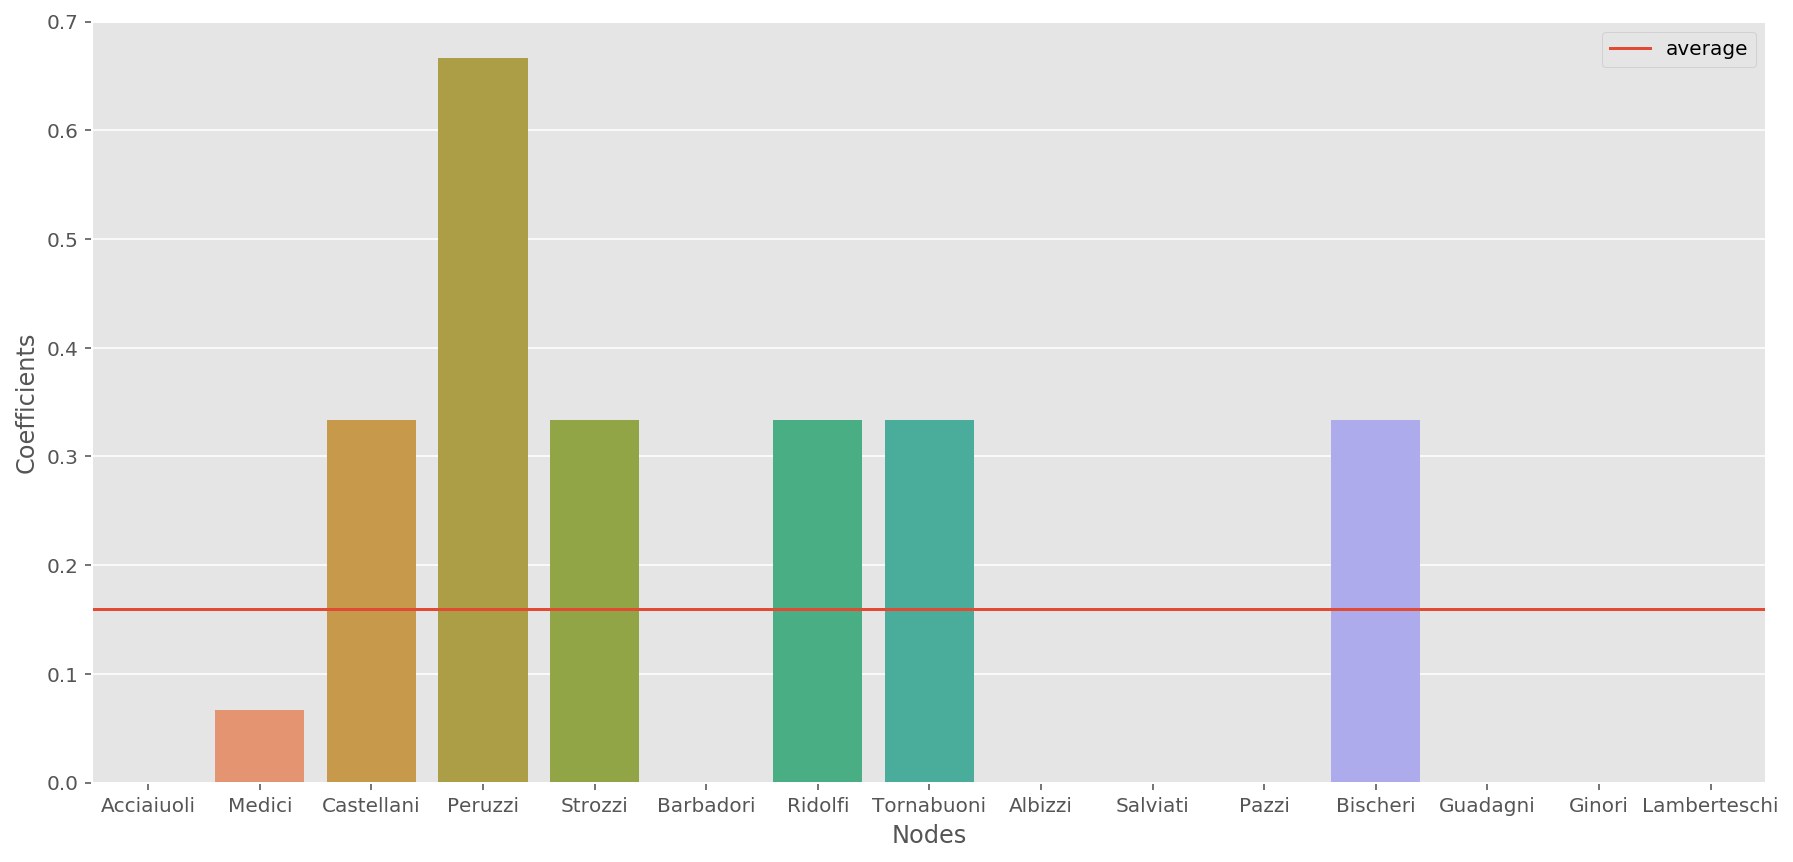

In [261]:
plt.figure(figsize=(15,7))
sns.barplot(x=list(nx.clustering(G_florentine).keys()),y=list(nx.clustering(G_florentine).values()))
plt.axhline(np.mean(list(nx.clustering(G_florentine).values())),label='average');
plt.ylabel('Coefficients')
plt.xlabel('Nodes')
plt.legend();

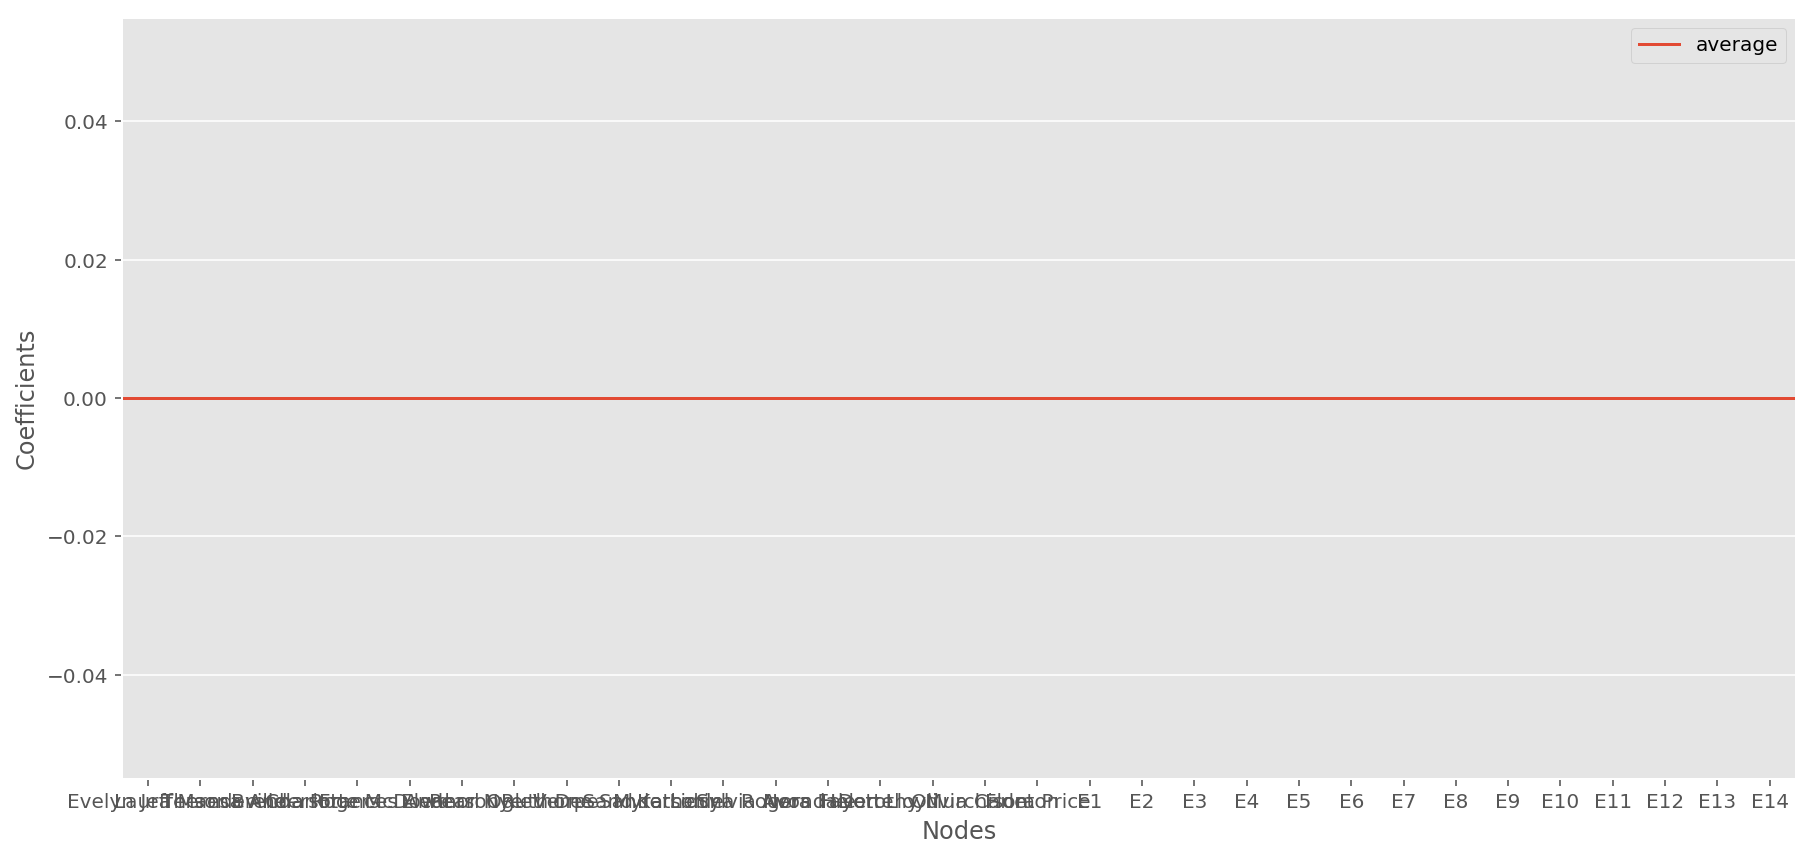

In [262]:
plt.figure(figsize=(15,7))
sns.barplot(x=list(nx.clustering(G_davis).keys()),y=list(nx.clustering(G_davis).values()))
plt.axhline(np.mean(list(nx.clustering(G_davis).values())),label='average');
plt.ylabel('Coefficients')
plt.xlabel('Nodes')
plt.legend();

## the shortest paths for the nodes and their average length

In [263]:
nx.shortest_path(G_karate)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  17: [0, 17],
  19: [0, 19],
  21: [0, 21],
  31: [0, 31],
  30: [0, 1, 30],
  9: [0, 2, 9],
  27: [0, 2, 27],
  28: [0, 2, 28],
  32: [0, 2, 32],
  16: [0, 5, 16],
  33: [0, 8, 33],
  24: [0, 31, 24],
  25: [0, 31, 25],
  23: [0, 2, 27, 23],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  18: [0, 2, 32, 18],
  20: [0, 2, 32, 20],
  22: [0, 2, 32, 22],
  29: [0, 2, 32, 29],
  26: [0, 8, 33, 26]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  7: [1, 7],
  13: [1, 13],
  17: [1, 17],
  19: [1, 19],
  21: [1, 21],
  30: [1, 30],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  8: [1, 0, 8],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  31: [1, 0, 31],
  9: [1, 2, 9],
  27: [1, 2, 27],
  28: [1, 2, 28],
  32: [1, 2, 32],
  33: [1, 13, 33],
  16: [1, 0, 5, 16],
  24: [1, 0, 31, 24],
  25: [1, 0, 31,

In [264]:
average_lenghs={}
for i in dict(nx.shortest_path_length(G_karate)).keys():
    average_lenghs[i]=np.mean(list(dict(nx.shortest_path_length(G_karate))[i].values()))
average_lenghs

{0: 1.7058823529411764,
 1: 2.0,
 2: 1.7352941176470589,
 3: 2.088235294117647,
 4: 2.5588235294117645,
 5: 2.5294117647058822,
 6: 2.5294117647058822,
 7: 2.2058823529411766,
 8: 1.8823529411764706,
 9: 2.235294117647059,
 10: 2.5588235294117645,
 11: 2.6470588235294117,
 12: 2.6176470588235294,
 13: 1.8823529411764706,
 14: 2.6176470588235294,
 15: 2.6176470588235294,
 16: 3.411764705882353,
 17: 2.588235294117647,
 18: 2.6176470588235294,
 19: 1.9411764705882353,
 20: 2.6176470588235294,
 21: 2.588235294117647,
 22: 2.6176470588235294,
 23: 2.4705882352941178,
 24: 2.588235294117647,
 25: 2.588235294117647,
 26: 2.676470588235294,
 27: 2.1176470588235294,
 28: 2.1470588235294117,
 29: 2.5294117647058822,
 30: 2.1176470588235294,
 31: 1.7941176470588236,
 32: 1.8823529411764706,
 33: 1.7647058823529411}

In [265]:
nx.shortest_path(G_florentine)

{'Acciaiuoli': {'Acciaiuoli': ['Acciaiuoli'],
  'Medici': ['Acciaiuoli', 'Medici'],
  'Barbadori': ['Acciaiuoli', 'Medici', 'Barbadori'],
  'Ridolfi': ['Acciaiuoli', 'Medici', 'Ridolfi'],
  'Tornabuoni': ['Acciaiuoli', 'Medici', 'Tornabuoni'],
  'Albizzi': ['Acciaiuoli', 'Medici', 'Albizzi'],
  'Salviati': ['Acciaiuoli', 'Medici', 'Salviati'],
  'Castellani': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani'],
  'Strozzi': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi'],
  'Guadagni': ['Acciaiuoli', 'Medici', 'Tornabuoni', 'Guadagni'],
  'Ginori': ['Acciaiuoli', 'Medici', 'Albizzi', 'Ginori'],
  'Pazzi': ['Acciaiuoli', 'Medici', 'Salviati', 'Pazzi'],
  'Peruzzi': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
  'Bischeri': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi', 'Bischeri'],
  'Lamberteschi': ['Acciaiuoli',
   'Medici',
   'Tornabuoni',
   'Guadagni',
   'Lamberteschi']},
 'Medici': {'Medici': ['Medici'],
  'Acciaiuoli': ['Medici', 'Acciaiuoli'],
  'Barbadori': 

In [266]:
average_lenghs={}
for i in dict(nx.shortest_path_length(G_florentine)).keys():
    average_lenghs[i]=np.mean(list(dict(nx.shortest_path_length(G_florentine))[i].values()))
average_lenghs


{'Acciaiuoli': 2.533333333333333,
 'Medici': 1.6666666666666667,
 'Castellani': 2.4,
 'Peruzzi': 2.533333333333333,
 'Strozzi': 2.1333333333333333,
 'Barbadori': 2.1333333333333333,
 'Ridolfi': 1.8666666666666667,
 'Tornabuoni': 1.9333333333333333,
 'Albizzi': 1.9333333333333333,
 'Salviati': 2.4,
 'Pazzi': 3.2666666666666666,
 'Bischeri': 2.3333333333333335,
 'Guadagni': 2.0,
 'Ginori': 2.8,
 'Lamberteschi': 2.8666666666666667}

In [267]:
nx.shortest_path(G_davis)

{'Evelyn Jefferson': {'Evelyn Jefferson': ['Evelyn Jefferson'],
  'E1': ['Evelyn Jefferson', 'E1'],
  'E2': ['Evelyn Jefferson', 'E2'],
  'E3': ['Evelyn Jefferson', 'E3'],
  'E4': ['Evelyn Jefferson', 'E4'],
  'E5': ['Evelyn Jefferson', 'E5'],
  'E6': ['Evelyn Jefferson', 'E6'],
  'E8': ['Evelyn Jefferson', 'E8'],
  'E9': ['Evelyn Jefferson', 'E9'],
  'Laura Mandeville': ['Evelyn Jefferson', 'E1', 'Laura Mandeville'],
  'Brenda Rogers': ['Evelyn Jefferson', 'E1', 'Brenda Rogers'],
  'Theresa Anderson': ['Evelyn Jefferson', 'E2', 'Theresa Anderson'],
  'Charlotte McDowd': ['Evelyn Jefferson', 'E3', 'Charlotte McDowd'],
  'Frances Anderson': ['Evelyn Jefferson', 'E3', 'Frances Anderson'],
  'Eleanor Nye': ['Evelyn Jefferson', 'E5', 'Eleanor Nye'],
  'Ruth DeSand': ['Evelyn Jefferson', 'E5', 'Ruth DeSand'],
  'Pearl Oglethorpe': ['Evelyn Jefferson', 'E6', 'Pearl Oglethorpe'],
  'Nora Fayette': ['Evelyn Jefferson', 'E6', 'Nora Fayette'],
  'Verne Sanderson': ['Evelyn Jefferson', 'E8', 'Ver

In [268]:
average_lenghs={}
for i in dict(nx.shortest_path_length(G_davis)).keys():
    average_lenghs[i]=np.mean(list(dict(nx.shortest_path_length(G_davis))[i].values()))
average_lenghs

{'Evelyn Jefferson': 1.875,
 'Laura Mandeville': 2.0625,
 'Theresa Anderson': 1.875,
 'Brenda Rogers': 2.0625,
 'Charlotte McDowd': 2.5,
 'Frances Anderson': 2.25,
 'Eleanor Nye': 2.25,
 'Pearl Oglethorpe': 2.25,
 'Ruth DeSand': 2.125,
 'Verne Sanderson': 2.125,
 'Myra Liddel': 2.1875,
 'Katherina Rogers': 2.0625,
 'Sylvia Avondale': 1.9375,
 'Nora Fayette': 1.875,
 'Helen Lloyd': 2.0625,
 'Dorothy Murchison': 2.3125,
 'Olivia Carleton': 2.5625,
 'Flora Price': 2.5625,
 'E1': 2.625,
 'E2': 2.625,
 'E3': 2.4375,
 'E4': 2.5625,
 'E5': 2.3125,
 'E6': 2.0,
 'E7': 1.875,
 'E8': 1.625,
 'E9': 1.75,
 'E10': 2.5,
 'E11': 2.5625,
 'E12': 2.4375,
 'E13': 2.625,
 'E14': 2.625}

## obtain the vertex and edge betweenness ranking for each graph

In [269]:
nx.betweenness_centrality(G_karate)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [270]:
nx.betweenness_centrality(G_florentine)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

In [271]:
nx.betweenness_centrality(G_davis)

{'Evelyn Jefferson': 0.09243053952845212,
 'Laura Mandeville': 0.04914868366576943,
 'Theresa Anderson': 0.08382717212549207,
 'Brenda Rogers': 0.04735814390994237,
 'Charlotte McDowd': 0.010140350205990675,
 'Frances Anderson': 0.010253510918225078,
 'Eleanor Nye': 0.009037924491193493,
 'Pearl Oglethorpe': 0.006507836308894933,
 'Ruth DeSand': 0.01606125402625199,
 'Verne Sanderson': 0.015060776907855697,
 'Myra Liddel': 0.01564136563963574,
 'Katherina Rogers': 0.0453256463296124,
 'Sylvia Avondale': 0.06862488078028632,
 'Nora Fayette': 0.10858130346049079,
 'Helen Lloyd': 0.0405644200615806,
 'Dorothy Murchison': 0.0018695041988760154,
 'Olivia Carleton': 0.00483710716158534,
 'Flora Price': 0.00483710716158534,
 'E1': 0.00209408273924403,
 'E2': 0.0020303032187582275,
 'E3': 0.017714891753424267,
 'E4': 0.007486726470019202,
 'E5': 0.03664061940065164,
 'E6': 0.06319868906402719,
 'E7': 0.1258812653738273,
 'E8': 0.23700300426238308,
 'E9': 0.21920891071174742,
 'E10': 0.01112241

## plot the graph

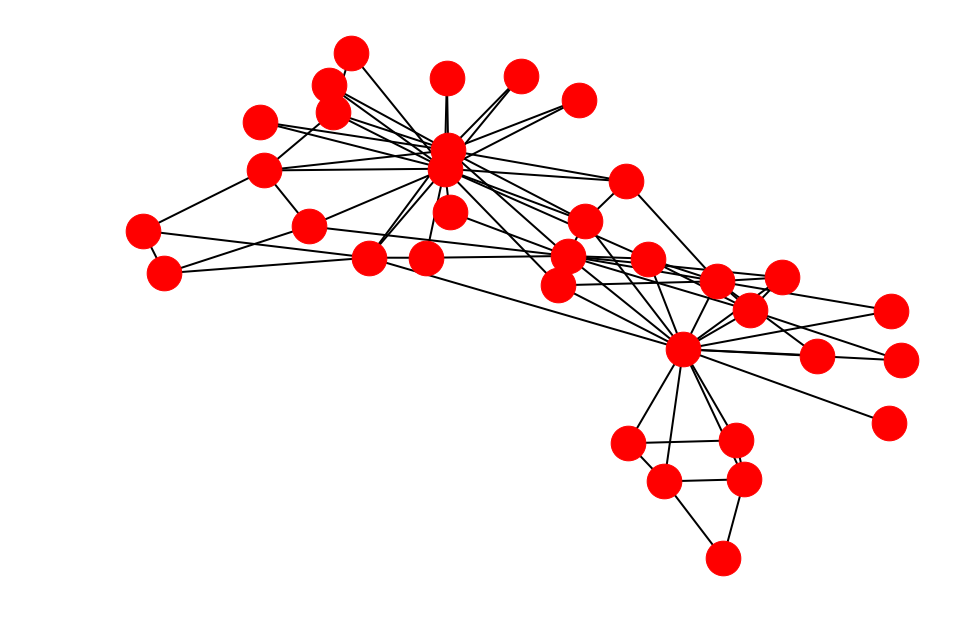

In [272]:
nx.draw(G_karate)

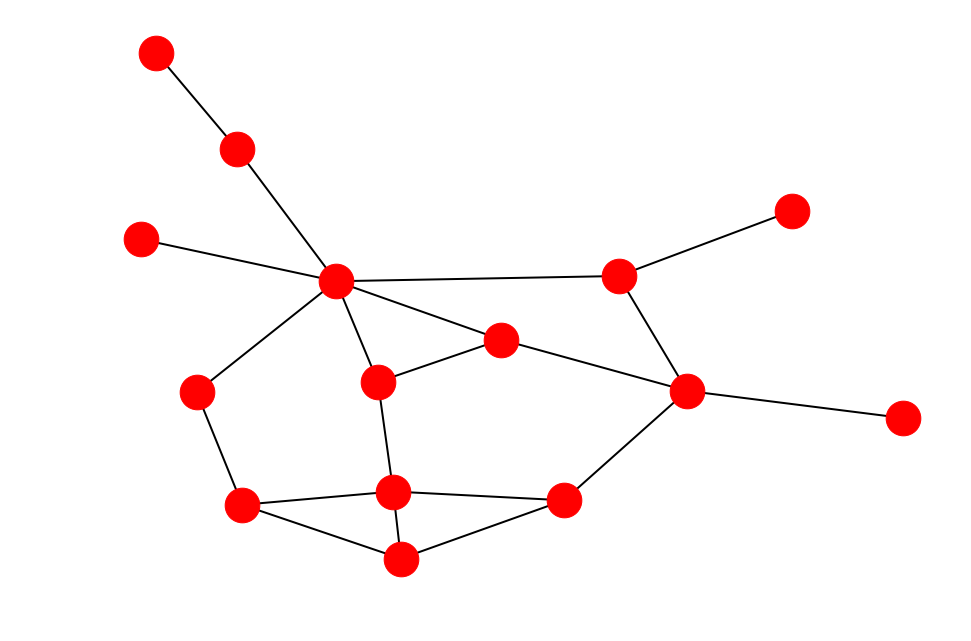

In [273]:
nx.draw(G_florentine)

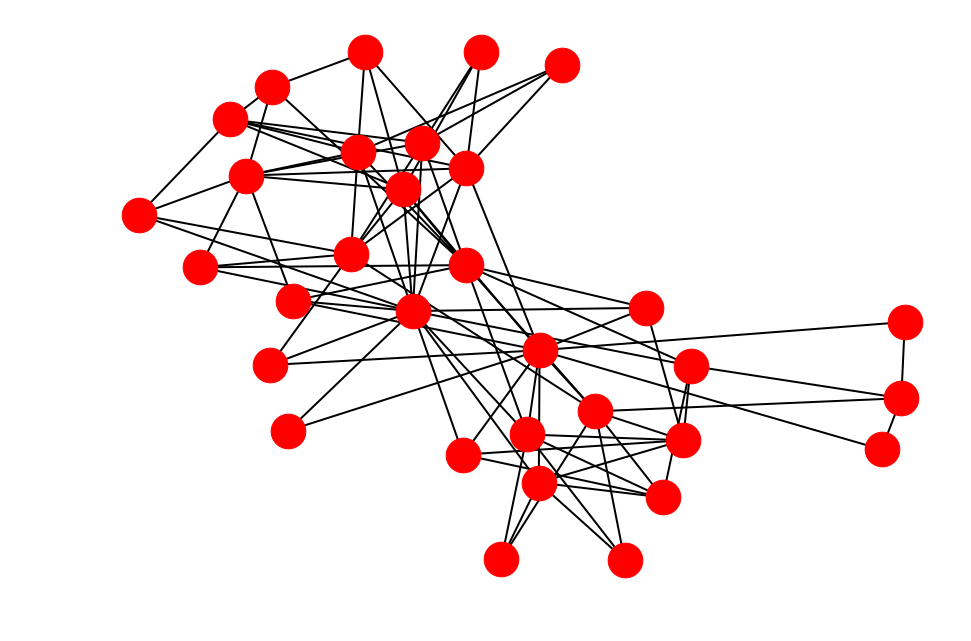

In [274]:
nx.draw(G_davis)

## use the Girvan-Newman algorithm for community detection


In [275]:
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G_karate)
tuple(sorted(c) for c in next(comp))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [276]:
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G_florentine)
tuple(sorted(c) for c in next(comp))

(['Acciaiuoli',
  'Albizzi',
  'Barbadori',
  'Bischeri',
  'Castellani',
  'Ginori',
  'Guadagni',
  'Lamberteschi',
  'Medici',
  'Peruzzi',
  'Ridolfi',
  'Strozzi',
  'Tornabuoni'],
 ['Pazzi', 'Salviati'])

In [277]:
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G_davis)
tuple(sorted(c) for c in next(comp))

(['Brenda Rogers',
  'Charlotte McDowd',
  'E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'Eleanor Nye',
  'Evelyn Jefferson',
  'Frances Anderson',
  'Laura Mandeville',
  'Pearl Oglethorpe',
  'Ruth DeSand',
  'Theresa Anderson',
  'Verne Sanderson'],
 ['Dorothy Murchison',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14',
  'E9',
  'Flora Price',
  'Helen Lloyd',
  'Katherina Rogers',
  'Myra Liddel',
  'Nora Fayette',
  'Olivia Carleton',
  'Sylvia Avondale'])

## use hierarchical clustering for community detection

[[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

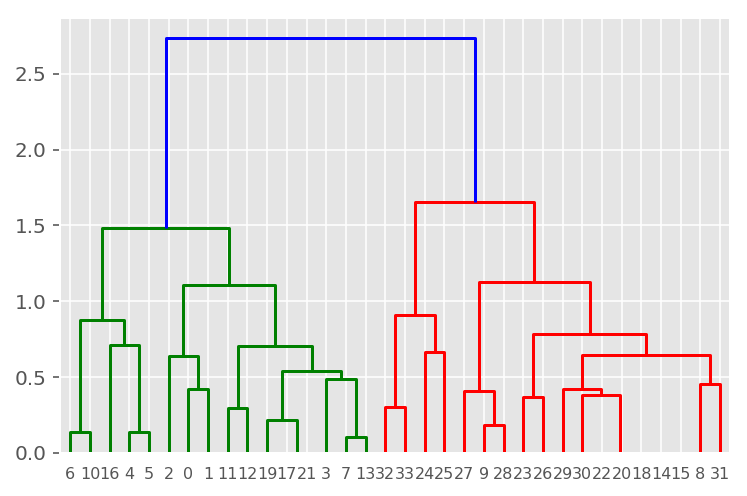

In [278]:
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard
from scipy.cluster.hierarchy import fcluster, cophenet

A = nx.adjacency_matrix(G_karate).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='ward')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_karate.nodes()))

group1=[]
group2=[]
for v,k in zip(fcluster(Z,2,criterion='maxclust'),G_karate.nodes()):
    if v==1:
        group1.append(k)
    else:
        group2.append(k)
group=[group1]+[group2]
group

[[1, 10, 12, 13], [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14]]

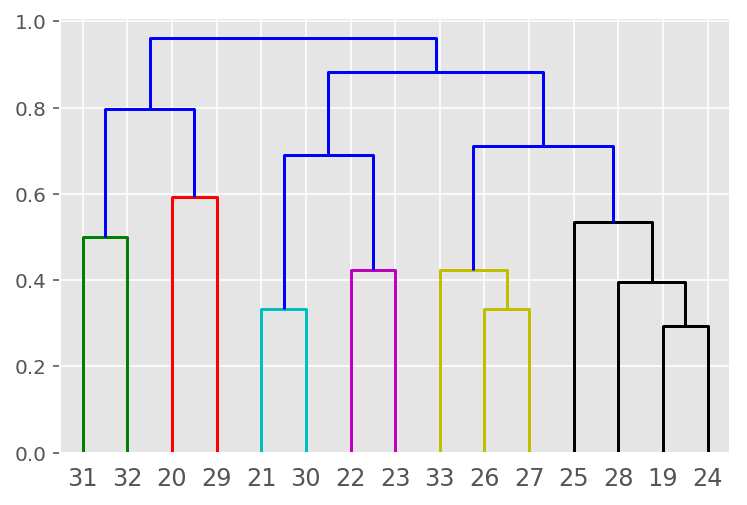

In [279]:
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard
from scipy.cluster.hierarchy import fcluster, cophenet

A = nx.adjacency_matrix(G_florentine).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='average')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_karate.nodes()))

group1=[]
group2=[]
for v,k in zip(fcluster(Z,2,criterion='maxclust'),G_karate.nodes()):
    if v==1:
        group1.append(k)
    else:
        group2.append(k)
group=[group1]+[group2]
group

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]

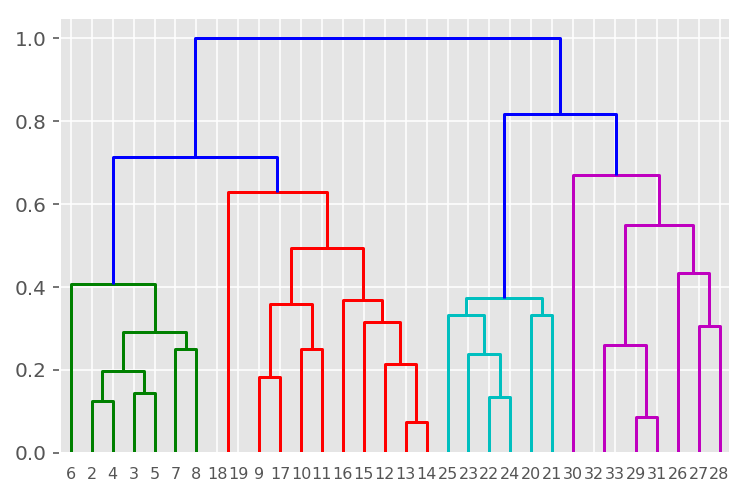

In [280]:
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard
from scipy.cluster.hierarchy import fcluster, cophenet

A = nx.adjacency_matrix(G_davis).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='average')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_karate.nodes()))

group1=[]
group2=[]
for v,k in zip(fcluster(Z,2,criterion='maxclust'),G_karate.nodes()):
    if v==1:
        group1.append(k)
    else:
        group2.append(k)
group=[group1]+[group2]
group

In [ ]:
# the two methods gives a slightly different results.